In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("housing_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


EDA PROCESS

In [3]:
df.drop(['Id','Utilities'],axis=1,inplace=True)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [5]:
df.iloc[:,:20].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
dtype: int64

In [6]:
df.iloc[:,20:41].isnull().sum()

RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
dtype: int64

In [7]:
df.iloc[:,41:61].isnull().sum()

1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     551
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageCars        0
GarageArea        0
dtype: int64

In [8]:
df.iloc[:,61:].isnull().sum()

GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [10]:
list=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
for i in list:
    vc=df[i].value_counts()
    print(vc)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Grvl    41
Pave    36
Name: Alley, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotC

In [11]:
list=['Alley','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2','FireplaceQu', 'GarageType',
        'GarageFinish','GarageQual',
       'GarageCond','PoolQC',
       'Fence', 'MiscFeature']
for val in list:
    df[val]=df[val].replace(np.NaN,"NA")
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,NA,NA,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,NA,IR1,Lvl,Inside,Mod,...,0,NA,NA,NA,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,NA,NA,NA,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,7,2008,WD,Normal,40000


In [12]:
list=['LotFrontage','LotArea','MasVnrArea']
for val in list:
    df[val]=df[val].replace(np.NaN,df[val].median())
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,NA,NA,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,NA,IR1,Lvl,Inside,Mod,...,0,NA,NA,NA,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,NA,NA,NA,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,1,2010,COD,Normal,190000
4,20,RL,70.0,16635,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.0,9819,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,7,2008,WD,Normal,40000


In [13]:
list=['MasVnrType','GarageYrBlt']
for val in list:
    df[val]=df[val].replace(np.NaN,df[val].mode()[0])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,NA,NA,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,NA,IR1,Lvl,Inside,Mod,...,0,NA,NA,NA,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,NA,NA,NA,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,1,2010,COD,Normal,190000
4,20,RL,70.0,16635,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.0,9819,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,NA,NA,NA,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,...,0,NA,MnPrv,NA,0,7,2008,WD,Normal,40000


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.iloc[:,:40].dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
dtype: object

In [16]:
df.iloc[:,40:].dtypes

Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

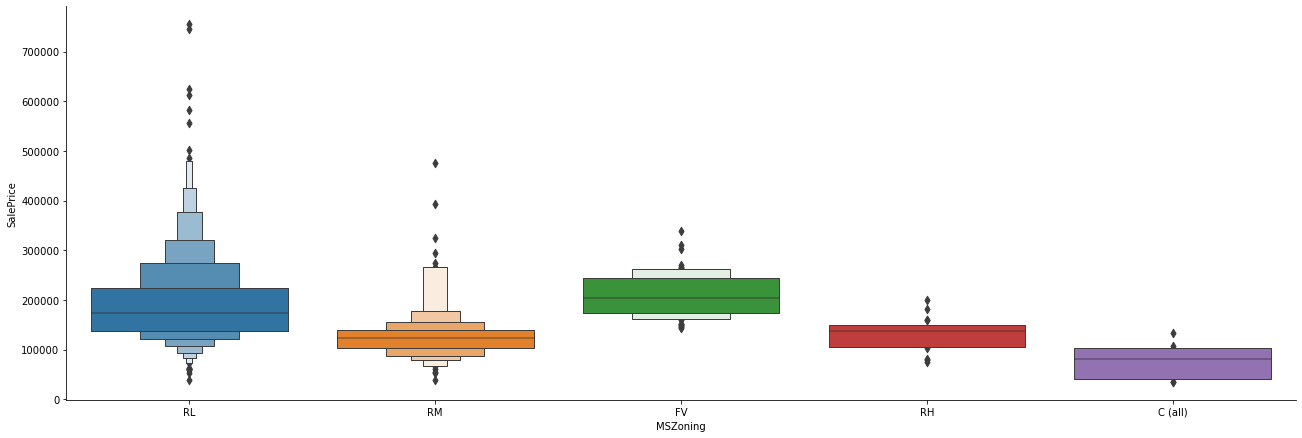

In [17]:
sns.catplot(y = "SalePrice", x = "MSZoning", data = df.sort_values("SalePrice", ascending = False), kind="boxen", height = 6, aspect = 3)

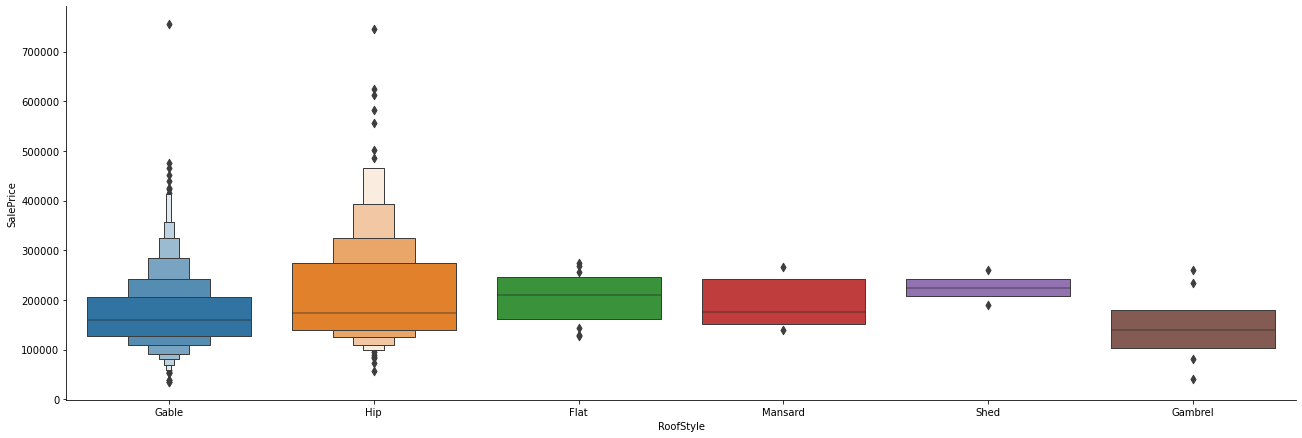

In [18]:
sns.catplot(y = "SalePrice", x = "RoofStyle", data = df.sort_values("SalePrice", ascending = False), kind="boxen", height = 6, aspect = 3)

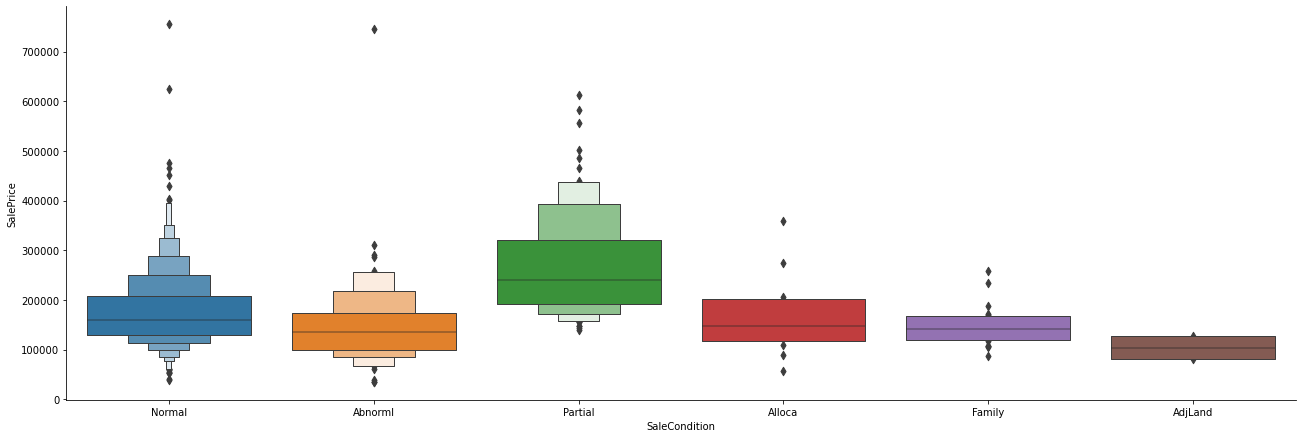

In [19]:
sns.catplot(y = "SalePrice", x = "SaleCondition", data = df.sort_values("SalePrice", ascending = False), kind="boxen", height = 6, aspect = 3)

ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']
for val in list:
    df[val]=le.fit_transform(df[val])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.0,4928,1,1,0,3,4,0,...,0,3,4,1,0,2,2007,8,4,128000
1,20,3,95.0,15865,1,1,0,3,4,1,...,0,3,4,1,0,10,2007,8,4,268000
2,60,3,92.0,9920,1,1,0,3,1,0,...,0,3,4,1,0,6,2007,8,4,269790
3,20,3,105.0,11751,1,1,0,3,4,0,...,0,3,2,1,0,1,2010,0,4,190000
4,20,3,70.0,16635,1,1,0,3,2,0,...,0,3,4,1,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,70.0,9819,1,1,0,3,4,0,...,0,3,2,1,0,2,2010,8,4,122000
1164,20,3,67.0,8777,1,1,3,3,4,0,...,0,3,2,1,0,5,2009,8,4,108000
1165,160,3,24.0,2280,1,1,3,3,2,0,...,0,3,4,1,0,7,2009,8,4,148500
1166,70,0,50.0,8500,1,2,3,3,4,0,...,0,3,2,1,0,7,2008,8,4,40000


In [21]:
df["SalePrice"]=df["SalePrice"].astype(float)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'Alley'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'LotConfig'}>],
       [<AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
    

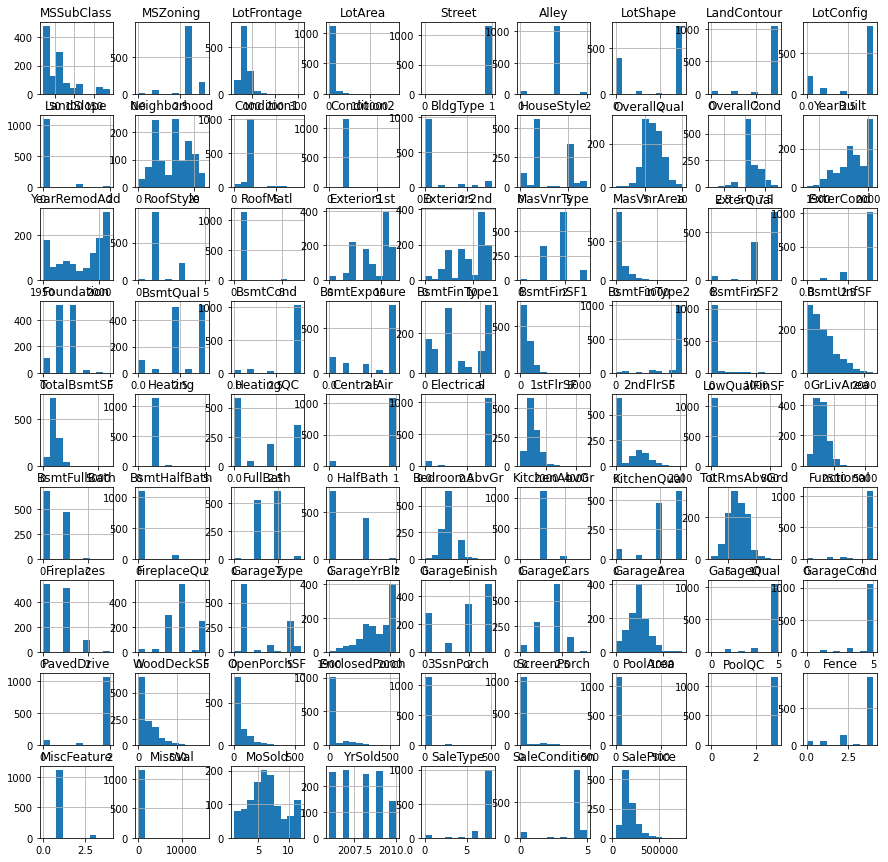

In [22]:
df.hist(figsize=(15,15),grid=True,layout=(9,9))

In [23]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,70.807363,10484.749144,0.996575,0.995719,1.938356,2.773973,3.004281,0.064212,...,3.448630,2.988870,3.475171,1.070205,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,41.940650,0.633120,22.440317,8957.442311,0.058445,0.256832,1.412262,0.710027,1.642667,0.284088,...,44.896939,0.157245,1.112090,0.377430,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7621.500000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,50.000000,3.000000,70.000000,9522.500000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,70.000000,3.000000,79.250000,11515.500000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,190.000000,4.000000,313.000000,164660.000000,1.000000,2.000000,3.000000,3.000000,4.000000,2.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [24]:
df.iloc[:,:40].skew()

MSSubClass       1.422019
MSZoning        -1.796785
LotFrontage      2.733440
LotArea         10.659285
Street         -17.021969
Alley           -0.203241
LotShape        -0.603775
LandContour     -3.125982
LotConfig       -1.118821
LandSlope        4.812568
Neighborhood     0.043735
Condition1       3.008289
Condition2      11.514458
BldgType         2.318657
HouseStyle       0.285680
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
RoofStyle        1.498560
RoofMatl         7.577352
Exterior1st     -0.612816
Exterior2nd     -0.592349
MasVnrType      -0.104609
MasVnrArea       2.835718
ExterQual       -1.810843
ExterCond       -2.516219
Foundation      -0.002761
BsmtQual        -0.487530
BsmtCond        -2.816444
BsmtExposure    -0.960565
BsmtFinType1     0.100811
BsmtFinSF1       1.871606
BsmtFinType2    -3.144813
BsmtFinSF2       4.365829
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
Heating         10.103609
HeatingQC   

In [25]:
df.iloc[:,40:].skew()

Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
KitchenQual      -1.408106
TotRmsAbvGrd      0.644657
Functional       -3.999663
Fireplaces        0.671966
FireplaceQu       0.276250
GarageType        0.625609
GarageYrBlt      -0.708074
GarageFinish     -0.632475
GarageCars       -0.358556
GarageArea        0.189665
GarageQual       -3.259700
GarageCond       -3.573044
PavedDrive       -3.274035
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
PoolQC          -15.903184
Fence            -1.955758
MiscFeature       4.958391
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
S

MSSubClass         AxesSubplot(0.125,0.808774;0.0731132x0.0712264)
MSZoning         AxesSubplot(0.212736,0.808774;0.0731132x0.0712...
LotFrontage      AxesSubplot(0.300472,0.808774;0.0731132x0.0712...
LotArea          AxesSubplot(0.388208,0.808774;0.0731132x0.0712...
Street           AxesSubplot(0.475943,0.808774;0.0731132x0.0712...
                                       ...                        
MoSold             AxesSubplot(0.300472,0.125;0.0731132x0.0712264)
YrSold             AxesSubplot(0.388208,0.125;0.0731132x0.0712264)
SaleType           AxesSubplot(0.475943,0.125;0.0731132x0.0712264)
SaleCondition      AxesSubplot(0.563679,0.125;0.0731132x0.0712264)
SalePrice          AxesSubplot(0.651415,0.125;0.0731132x0.0712264)
Length: 79, dtype: object

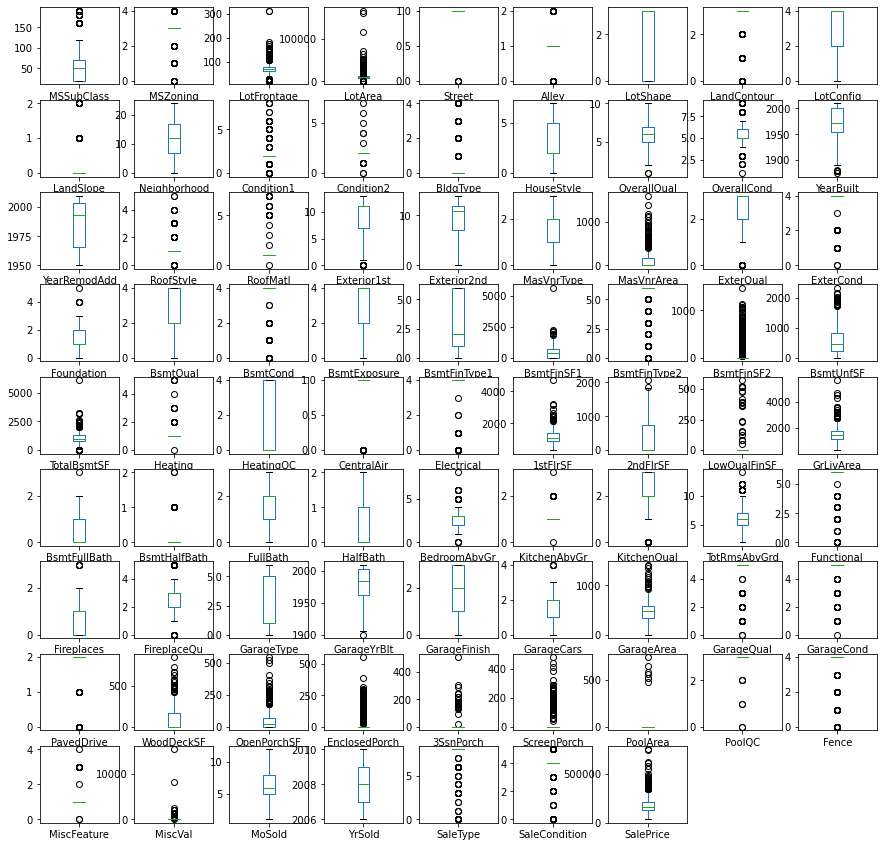

In [26]:
df.plot(kind="box",subplots=True,layout=(9,9),figsize=(15,15))

Z SCORE METHOD

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.50830058, 0.02164599, 0.03599365, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07854983, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.94480461, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.08675364, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.92762843, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.03599365, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.0,4928,1,1,0,3,4,0,...,0,3,4,1,0,2,2007,8,4,128000.0
2,60,3,92.0,9920,1,1,0,3,1,0,...,0,3,4,1,0,6,2007,8,4,269790.0
5,60,3,58.0,14054,1,1,0,3,4,0,...,0,3,4,1,0,11,2006,6,5,219210.0
6,20,3,70.0,11341,1,1,0,3,4,0,...,0,3,4,1,0,5,2010,8,4,121500.0
11,60,3,44.0,9548,1,1,0,3,1,0,...,0,3,4,1,0,1,2010,8,4,237000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,20,3,70.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,6,2006,8,4,165000.0
1161,60,3,70.0,10762,1,1,0,3,1,0,...,0,3,4,1,0,5,2009,8,4,225000.0
1163,20,3,70.0,9819,1,1,0,3,4,0,...,0,3,2,1,0,2,2010,8,4,122000.0
1165,160,3,24.0,2280,1,1,3,3,2,0,...,0,3,4,1,0,7,2009,8,4,148500.0


In [29]:
df.shape

(1168, 79)

In [30]:
448/1168

0.3835616438356164

In [31]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [32]:
values=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Condition1', 'Condition2', 'BldgType','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrArea',
       'ExterQual', 'ExterCond','BsmtCond',
       'BsmtExposure','BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','Heating','CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath','HalfBath','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces','GarageType', 'GarageYrBlt',
       'GarageFinish','GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','SaleType', 'SaleCondition']
for i in values:
    df[i]=np.log1p(df[i])
df.skew()

MSSubClass        0.235373
MSZoning         -3.487758
LotFrontage      -0.793980
LotArea          -0.169107
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -4.571620
SaleCondition    -3.137990
SalePrice         1.953878
Length: 79, dtype: float64

In [33]:
df.iloc[:,:40].skew()

MSSubClass       0.235373
MSZoning        -3.487758
LotFrontage     -0.793980
LotArea         -0.169107
Street         -17.021969
Alley           -0.203241
LotShape        -0.638048
LandContour     -3.522846
LotConfig       -1.260510
LandSlope        4.293508
Neighborhood     0.043735
Condition1      -1.004873
Condition2      -1.931453
BldgType         2.084699
HouseStyle       0.285680
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
RoofStyle        1.164093
RoofMatl         7.016896
Exterior1st     -2.223726
Exterior2nd     -2.119404
MasVnrType      -0.104609
MasVnrArea       0.518966
ExterQual       -3.078206
ExterCond       -3.001021
Foundation      -0.002761
BsmtQual        -0.487530
BsmtCond        -3.269737
BsmtExposure    -1.258650
BsmtFinType1     0.100811
BsmtFinSF1      -0.606859
BsmtFinType2    -4.177772
BsmtFinSF2       2.502785
BsmtUnfSF       -2.129882
TotalBsmtSF     -5.146574
Heating          7.792625
HeatingQC   

In [34]:
df.iloc[:,40:].skew()

Electrical       -3.232437
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      3.678394
KitchenQual      -2.304610
TotRmsAbvGrd     -0.071926
Functional       -5.352389
Fireplaces        0.188280
FireplaceQu       0.276250
GarageType        0.497359
GarageYrBlt      -0.729642
GarageFinish     -0.929680
GarageCars       -0.358556
GarageArea        0.189665
GarageQual       -3.864768
GarageCond       -4.291515
PavedDrive       -3.389176
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
PoolQC          -18.196366
Fence            -2.607976
MiscFeature       4.421355
MiscVal           5.159109
MoSold            0.220979
YrSold            0.115765
SaleType         -4.571620
S

CORRELATION GRAPH

In [37]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.021051,-0.379241,-0.357587,-0.020634,0.060114,0.073170,-0.031097,0.058430,-0.016280,...,0.028308,-0.022721,0.074066,-0.038301,-0.033860,0.007338,-0.041683,0.066532,-0.014085,-0.009384
MSZoning,-0.021051,1.000000,-0.022215,0.000756,0.189540,-0.392268,0.000528,0.003636,-0.040900,-0.033422,...,0.005303,-0.004475,-0.063960,-0.023125,-0.009918,-0.050904,-0.005521,0.048729,0.057991,-0.070130
LotFrontage,-0.379241,-0.022215,1.000000,0.647849,-0.035823,-0.121601,-0.156434,-0.041565,-0.194907,0.048649,...,0.133104,-0.134007,-0.076069,0.017043,0.018541,0.032370,-0.006913,-0.009028,0.059264,0.325645
LotArea,-0.357587,0.000756,0.647849,1.000000,-0.110016,-0.114120,-0.270964,-0.074998,-0.177849,0.197405,...,0.110392,-0.089557,-0.032189,0.073831,0.094566,0.025985,-0.039069,-0.003373,0.044805,0.368951
Street,-0.020634,0.189540,-0.035823,-0.110016,1.000000,-0.000978,-0.012348,0.095997,0.002522,-0.133903,...,0.004551,-0.003840,-0.025151,-0.219402,-0.188785,-0.008860,-0.019635,0.013403,0.002938,0.044753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.007338,-0.050904,0.032370,0.025985,-0.008860,-0.025186,-0.049123,-0.012213,0.019034,0.031777,...,-0.042378,0.038131,-0.005692,0.020575,0.014392,1.000000,-0.144536,-0.047023,-0.020043,0.072764
YrSold,-0.041683,-0.005521,-0.006913,-0.039069,-0.019635,0.010096,0.021086,0.008166,-0.009570,-0.008361,...,-0.064147,0.064054,-0.036710,0.046244,0.036562,-0.144536,1.000000,-0.012410,0.045162,-0.045508
SaleType,0.066532,0.048729,-0.009028,-0.003373,0.013403,0.018315,-0.017566,-0.038478,0.003495,0.042999,...,0.014299,-0.015377,0.029100,-0.016842,-0.009424,-0.047023,-0.012410,1.000000,0.258221,0.016621
SaleCondition,-0.014085,0.057991,0.059264,0.044805,0.002938,-0.015732,-0.044721,0.046491,0.049989,-0.053919,...,-0.073491,0.124459,0.075660,-0.011532,0.012178,-0.020043,0.045162,0.258221,1.000000,0.170959


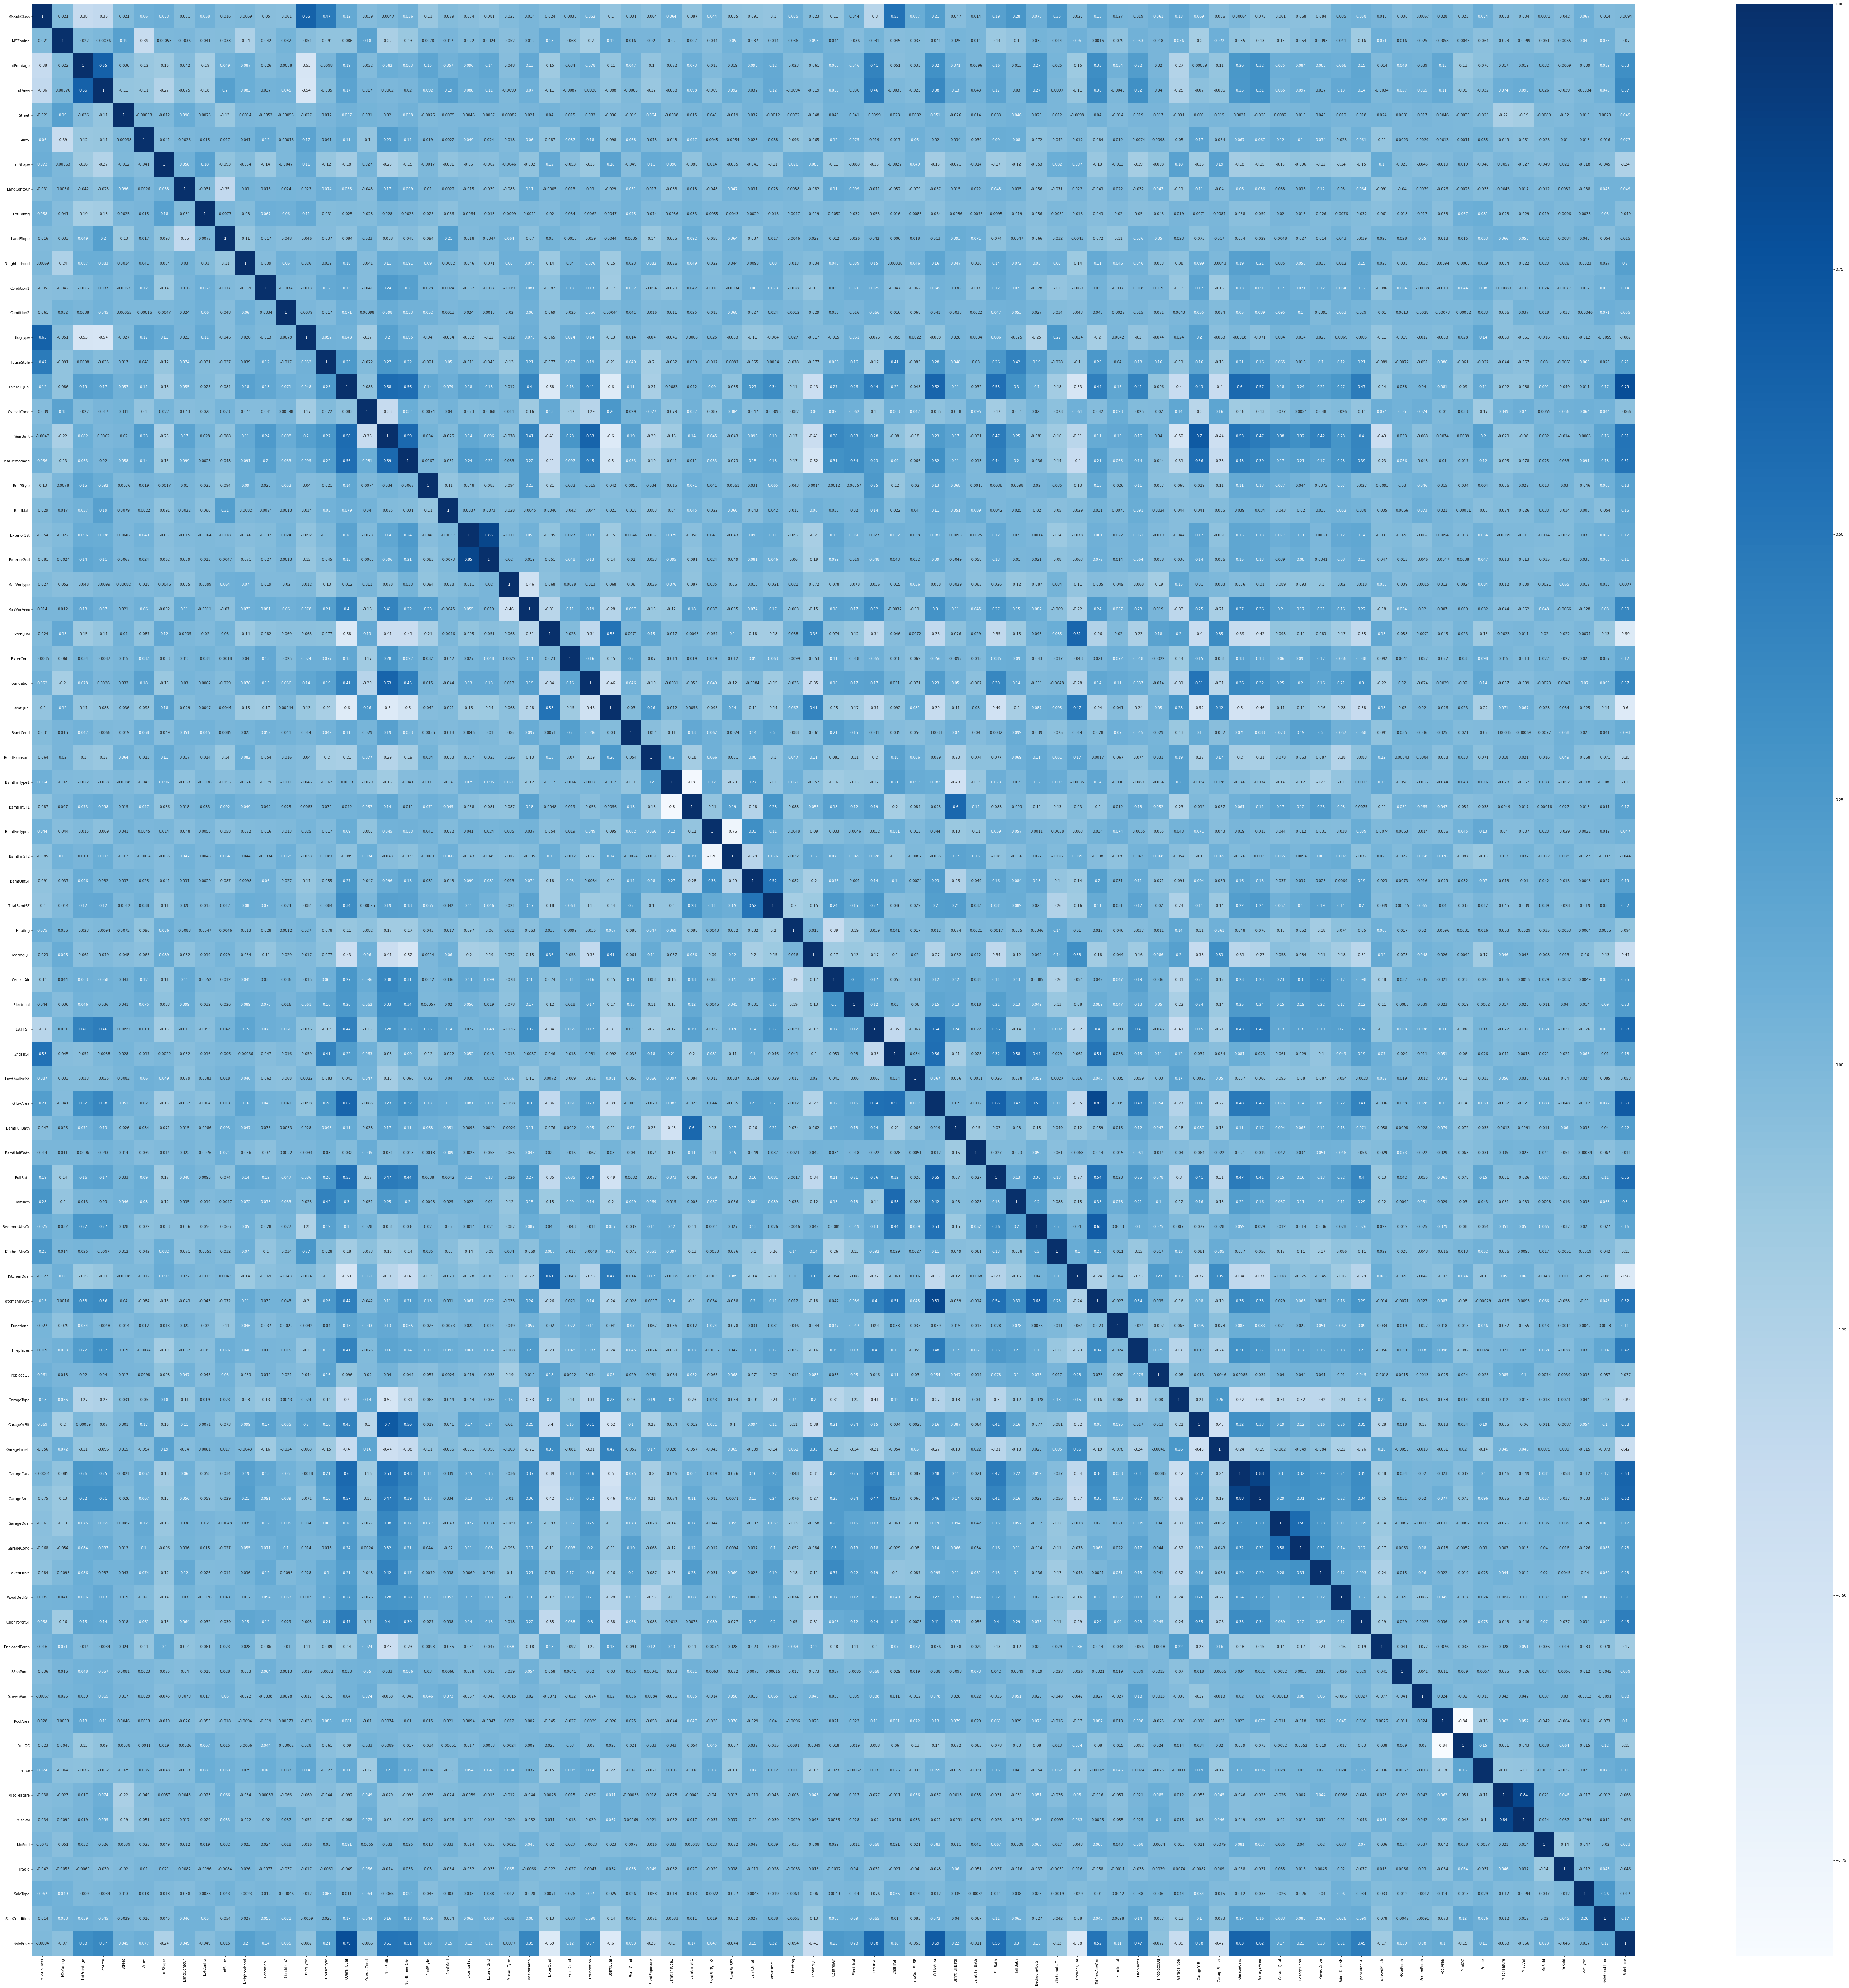

In [38]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'SalePrice']
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.795791,1.386294,4.262680,8.502891,0.693147,1,0.000000,1.386294,1.609438,0.000000,...,0.0000,0.0,1.386294,1.609438,0.693147,0.0,2,2007,2.197225,1.609438
1,3.044522,1.386294,4.564348,9.671934,0.693147,1,0.000000,1.386294,1.609438,0.693147,...,5.4161,0.0,1.386294,1.609438,0.693147,0.0,10,2007,2.197225,1.609438
2,4.110874,1.386294,4.532599,9.202409,0.693147,1,0.000000,1.386294,0.693147,0.000000,...,0.0000,0.0,1.386294,1.609438,0.693147,0.0,6,2007,2.197225,1.609438
3,3.044522,1.386294,4.663439,9.371779,0.693147,1,0.000000,1.386294,1.609438,0.000000,...,0.0000,0.0,1.386294,1.098612,0.693147,0.0,1,2010,0.000000,1.609438
4,3.044522,1.386294,4.262680,9.719324,0.693147,1,0.000000,1.386294,1.098612,0.000000,...,0.0000,0.0,1.386294,1.609438,0.693147,0.0,6,2009,2.197225,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.044522,1.386294,4.262680,9.192176,0.693147,1,0.000000,1.386294,1.609438,0.000000,...,0.0000,0.0,1.386294,1.098612,0.693147,0.0,2,2010,2.197225,1.609438
1164,3.044522,1.386294,4.219508,9.080004,0.693147,1,1.386294,1.386294,1.609438,0.000000,...,0.0000,0.0,1.386294,1.098612,0.693147,0.0,5,2009,2.197225,1.609438
1165,5.081404,1.386294,3.218876,7.732369,0.693147,1,1.386294,1.386294,1.098612,0.000000,...,0.0000,0.0,1.386294,1.609438,0.693147,0.0,7,2009,2.197225,1.609438
1166,4.262680,0.000000,3.931826,9.047939,0.693147,2,1.386294,1.386294,1.609438,0.000000,...,0.0000,0.0,1.386294,1.098612,0.693147,0.0,7,2008,2.197225,1.609438


In [40]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [44]:
df1=calc_vif(x)

In [49]:
df1.iloc[:40,:]

,variable,VIF factor
0,MSSubClass,225.259183
1,MSZoning,68.867425
2,LotFrontage,450.100636
3,LotArea,941.756401
4,Street,352.379839
5,Alley,22.164733
6,LotShape,3.736634
7,LandContour,24.762049
8,LotConfig,5.431109
9,LandSlope,1.518739


In [50]:
df1.iloc[40:,:]

,variable,VIF factor
40,Electrical,19.354038
41,1stFlrSF,9622.829488
42,2ndFlrSF,37.869070
43,LowQualFinSF,1.600361
44,GrLivArea,15553.982990
45,BsmtFullBath,3.572769
46,BsmtHalfBath,1.318802
47,FullBath,29.403935
48,HalfBath,4.000691
49,BedroomAbvGr,37.497221


STANDARD SCALER METHOD

In [51]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x

array([[ 1.42570841,  0.06831168,  0.10984519, ..., -0.60548713,
         0.2701389 ,  0.25285122],
       [-1.13127766,  0.06831168,  1.08672588, ..., -0.60548713,
         0.2701389 ,  0.25285122],
       [ 0.4256774 ,  0.06831168,  0.98391531, ..., -0.60548713,
         0.2701389 ,  0.25285122],
       ...,
       [ 1.84272655,  0.06831168, -3.2702646 , ...,  0.8992128 ,
         0.2701389 ,  0.25285122],
       [ 0.64732585, -6.53493145, -0.96154716, ...,  0.14686284,
         0.2701389 ,  0.25285122],
       [ 0.4256774 ,  0.06831168,  0.10984519, ..., -1.3578371 ,
         0.2701389 ,  0.25285122]])

In [52]:
y=df.iloc[:,df.columns == 'SalePrice']
y

,SalePrice
0,128000.0
1,268000.0
2,269790.0
3,190000.0
4,215000.0
...,...
1163,122000.0
1164,108000.0
1165,148500.0
1166,40000.0


MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [54]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8234426619838999 on random state 66


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=66)

In [56]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.7544495070489783
training score= 0.832392607606445
error= 34426.56098321021 

testing score= 0.8193029393755104
training score= 1.0
error= 33651.15096315874 

testing score= -6813647.555235858
training score= -0.042487873563074485
error= 81484.61682644792 

testing score= 0.8009295607136772
training score= 0.9761439091154177
error= 29829.81609790739 

testing score= 0.2911522853005736
training score= 0.8124615813349887
error= 46148.499976379055 



CROSS VALIDATION PROCESS

In [57]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.81875332 0.75411072 0.6979211  0.84014536 0.71897451]
mean_score= 0.7659809996802356
std= 0.05525926845629251 

score= [0.7994899  0.632757   0.75660435 0.7695778  0.63322197]
mean_score= 0.7183302036627894
std= 0.07105534354452582 

score= [-0.03507966 -0.13013085 -0.0273581  -0.11355796 -0.00308962]
mean_score= -0.06184323742823698
std= 0.05038871112112502 

score= [0.89655459 0.78495647 0.84578366 0.88854044 0.83260891]
mean_score= 0.8496888143082817
std= 0.04050456770318065 

score= [0.62234627 0.75878572 0.67542028 0.7135734  0.73511949]
mean_score= 0.7010490325623522
std= 0.04796277597872516 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters={"criterion":["squared_error","absolute_error", "poisson"],"warm_start":[True,False],"bootstrap": [True,False], "max_features": ["auto","sqrt","log2"]}

In [60]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [61]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [62]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_features': 'log2',
 'warm_start': False}

In [63]:
final_model=RandomForestRegressor(bootstrap=True,criterion="poisson",max_features="log2",warm_start=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.600594539480749
score= 0.9647518011534255
39312.83369452929


SAVING THE BEST MODEL

In [64]:
import joblib

joblib.dump(final_model,"housing_price_prediction.obj")

['housing_price_prediction.obj']

WORKING ON TEST DATASET

In [65]:
df_test=pd.read_csv("housing_test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


ENCODING CATEGORICAL OBJECTIVE COLUMNS IN TEST DATASET

In [66]:
df_test.drop(['Id','Utilities'],axis=1,inplace=True)

In [70]:
df_test.iloc[:,:40].isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
Alley           278
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
dtype: int64

In [71]:
df_test.iloc[:,40:].isnull().sum() #ELECTRICAL

Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      139
GarageType        17
GarageYrBlt       17
GarageFinish      17
GarageCars         0
GarageArea         0
GarageQual        17
GarageCond        17
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC           292
Fence            248
MiscFeature      282
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

In [72]:
list=['Alley','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2','FireplaceQu', 'GarageType',
        'GarageFinish','GarageQual',
       'GarageCond','PoolQC',
       'Fence', 'MiscFeature']
for val in list:
    df_test[val]=df_test[val].replace(np.NaN,"NA")
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,NA,IR1,HLS,Corner,Gtl,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
1,120,RL,NaN,5814,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,8,2009,COD,Abnorml
2,20,RL,NaN,11838,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,NA,Reg,Bnk,Inside,Gtl,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,NA,IR2,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
289,20,RL,NaN,11241,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,Shed,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,NA,Reg,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,10,2006,WD,Normal


In [73]:
list=['LotFrontage','LotArea','MasVnrArea']
for val in list:
    df_test[val]=df_test[val].replace(np.NaN,df_test[val].median())
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,NA,IR1,HLS,Corner,Gtl,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
1,120,RL,65.0,5814,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,8,2009,COD,Abnorml
2,20,RL,65.0,11838,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,NA,Reg,Bnk,Inside,Gtl,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,NA,IR2,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
289,20,RL,65.0,11241,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,Shed,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,NA,Reg,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,10,2006,WD,Normal


In [74]:
list=['MasVnrType','GarageYrBlt','Electrical']
for val in list:
    df_test[val]=df_test[val].replace(np.NaN,df_test[val].mode()[0])
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,NA,IR1,HLS,Corner,Gtl,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
1,120,RL,65.0,5814,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,8,2009,COD,Abnorml
2,20,RL,65.0,11838,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,NA,Reg,Bnk,Inside,Gtl,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,NA,IR2,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
289,20,RL,65.0,11241,Pave,NA,IR1,Lvl,CulDSac,Gtl,...,0,0,NA,NA,Shed,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,NA,Reg,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,10,2006,WD,Normal


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']
for val in list:
    df_test[val]=le.transform(df_test[val])
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,1,0,1,0,0,...,0,0,0,4,0,0,7,2007,5,2
1,120,2,65.0,5814,1,1,0,3,1,0,...,0,0,0,4,0,0,8,2009,0,0
2,20,2,65.0,11838,1,1,3,3,4,0,...,0,0,0,4,0,0,6,2009,5,2
3,70,2,75.0,12000,1,1,3,0,4,0,...,0,0,0,4,0,0,7,2009,5,2
4,60,2,86.0,14598,1,1,0,3,1,0,...,0,0,0,4,0,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.0,10206,1,1,3,3,4,0,...,0,0,0,4,0,0,10,2008,5,2
288,20,2,57.0,9245,1,1,1,3,4,0,...,0,0,0,4,0,0,2,2008,5,2
289,20,2,65.0,11241,1,1,0,3,1,0,...,0,0,0,4,2,700,3,2010,5,2
290,50,3,50.0,5000,1,1,3,3,0,0,...,0,0,0,4,0,0,10,2006,5,2


In [77]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
df_test=scale.fit_transform(df_test)
df_test

array([[-0.85605433, -0.28700579,  0.99228791, ..., -0.65090813,
         0.23029007,  0.14865423],
       [ 1.43198105, -0.28700579, -0.06042999, ...,  0.86355541,
        -6.49418003, -3.32390858],
       [-0.85605433, -0.28700579, -0.06042999, ...,  0.86355541,
         0.23029007,  0.14865423],
       ...,
       [-0.85605433, -0.28700579, -0.06042999, ...,  1.62078718,
         0.23029007,  0.14865423],
       [-0.16964372,  1.80813647, -0.81237135, ..., -1.4081399 ,
         0.23029007,  0.14865423],
       [ 2.3471952 ,  1.80813647, -2.26612464, ..., -1.4081399 ,
         0.23029007,  0.14865423]])

USING OUR MODEL ON TESTING FILE

In [78]:
housing_price_prediction_from_joblib=joblib.load("housing_price_prediction.obj")
housing_price_prediction_from_joblib.predict(df_test)

array([350430.53, 322109.08, 356333.33, 168991.5 , 344294.92, 124514.53,
       154563.89, 348729.79, 328415.82, 225658.81, 115552.1 , 211835.5 ,
       226136.72, 331646.78, 351906.1 , 134834.23, 123163.75, 124583.6 ,
       169325.41, 226653.  , 169820.29, 146188.14, 149909.32, 169305.  ,
       132540.46, 207366.5 , 192780.4 , 178493.9 , 223198.16, 252361.  ,
       158972.7 , 192026.79, 340206.53, 312475.36, 204016.  , 179704.  ,
       223686.79, 121916.  , 211227.89, 144457.5 , 145856.37, 432300.98,
       219517.1 , 178489.86, 152061.5 , 132069.16, 156668.6 , 120410.6 ,
       291131.2 , 368921.17, 148146.14, 334777.56,  96486.68, 104610.11,
       428769.28, 172000.99, 260663.39, 178537.05, 243994.  , 339350.77,
       135703.61, 225289.1 , 137014.16, 158011.95, 249549.74, 120091.5 ,
       165242.79, 241833.24, 120154.93, 293669.36, 366396.77, 253421.28,
       157976.16, 315437.11, 209741.5 , 325709.23, 310955.15, 287396.93,
       321422.76, 209899.5 , 235491.2 , 165750.58, 